In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('AR - Examples - 1.6.csv')

In [4]:
data.shape

(100, 3)

In [5]:
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [6]:
data.isnull().mean()*100

number_courses    0.0
time_study        0.0
Marks             0.0
dtype: float64

In [7]:
data[data['number_courses'] <= 0]

,number_courses,time_study,Marks


In [8]:
data[data['time_study'] <= 0]

,number_courses,time_study,Marks


In [9]:
data[data['Marks'] <= 0]

,number_courses,time_study,Marks


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


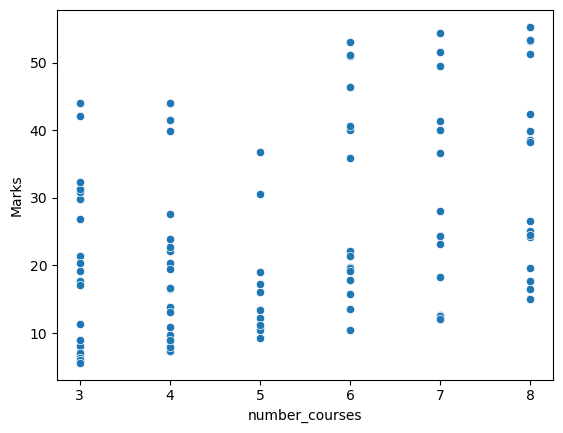

In [11]:
sns.scatterplot(data, x='number_courses', y='Marks')
plt.show()

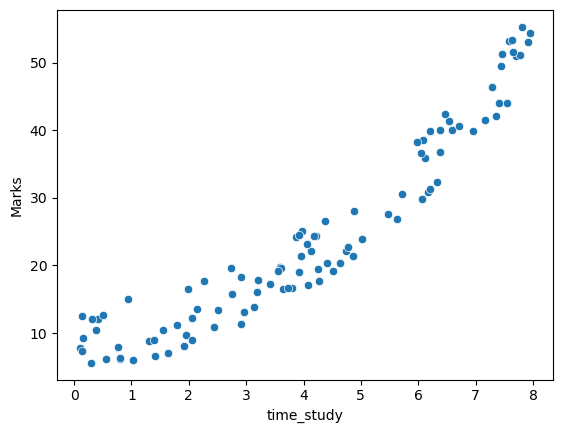

In [12]:
sns.scatterplot(data, x = 'time_study', y='Marks')
plt.show()

In [13]:
X = data[['number_courses', 'time_study']]
y = data['Marks']

## Analysis with statsmodel

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape, X_test.shape

((70, 2), (30, 2))

In [15]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

In [16]:
model.params

const            -8.655133
number_courses    1.984093
time_study        5.524667
dtype: float64

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     573.3
Date:                Tue, 07 May 2024   Prob (F-statistic):           7.19e-43
Time:                        09:16:02   Log-Likelihood:                -185.57
No. Observations:                  70   AIC:                             377.1
Df Residuals:                      67   BIC:                             383.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.6551      1.334     -6.486      0.000     -11.319      -5.992
number_courses     1.9841      0.225      8.814      0.000       1.535       2.433
time_study         5.5247      0.183     30.203      0.000       5.160       5.890
==============================================================================
Omnibus:                       13.452   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.505
Skew:                           0.539   Prob(JB):                       0.0387
Kurtosis:                       1.967   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(0, X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending=False)

In [19]:
vif

,Features,VIF
0,number_courses,3.662129
1,time_study,3.662129


In [20]:
y_train_pred = model.predict(X_train_sm)

In [21]:
r2_score(y_train, y_train_pred)

0.9447939538083865

In [22]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = model.predict(X_test_sm)

In [23]:
r2_score(y_test, y_test_pred)

0.9248301048182098

In [24]:
error_terms = y_train - y_train_pred

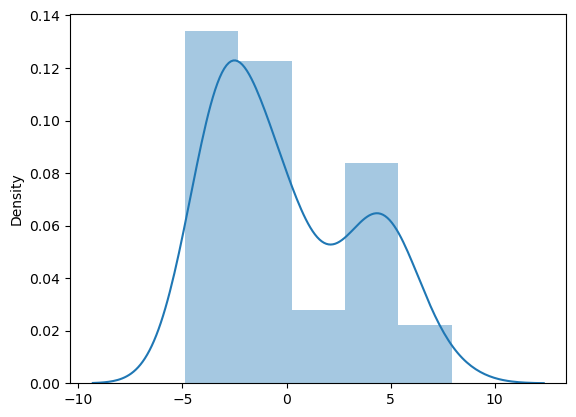

In [25]:
sns.distplot(error_terms)
plt.show()

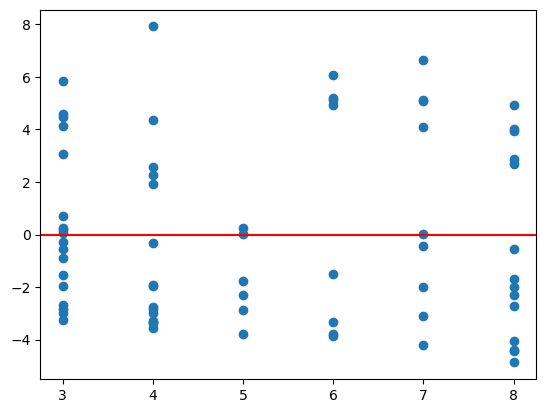

In [26]:
plt.scatter(x = X_train['number_courses'], y = error_terms)
plt.axhline(color='r')
plt.show()

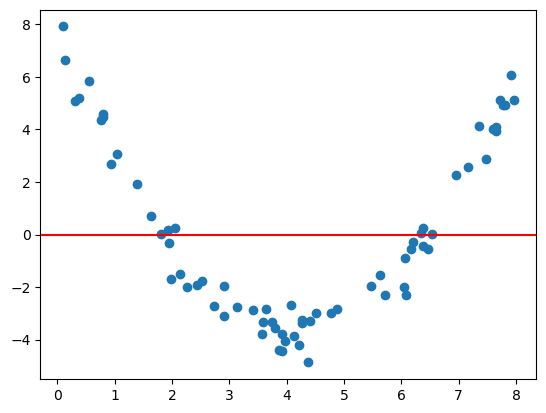

In [27]:
plt.scatter(x = X_train['time_study'], y = error_terms)
plt.axhline(color='r')
plt.show()

## Fitting polynomial regression model

In [28]:
data['time_study_squared'] = data['time_study'] * data['time_study']
data.head()

,number_courses,time_study,Marks,time_study_squared
0,3,4.508,19.202,20.322064
1,4,0.096,7.734,0.009216
2,4,3.133,13.811,9.815689
3,6,7.909,53.018,62.552281
4,8,7.811,55.299,61.011721


In [29]:
X = data.drop(columns=['Marks'])
y = data['Marks']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_train_pred = lr.predict(X_train)

In [33]:
r2_score(y_train, y_train_pred)

0.9996427380925696

In [34]:
error_terms = y_train - y_train_pred

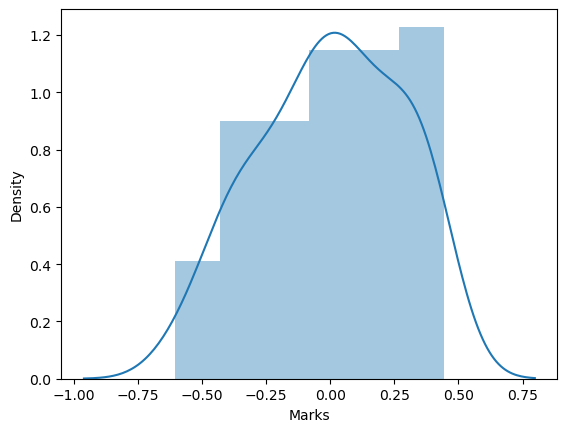

In [35]:
sns.distplot(error_terms)
plt.show()

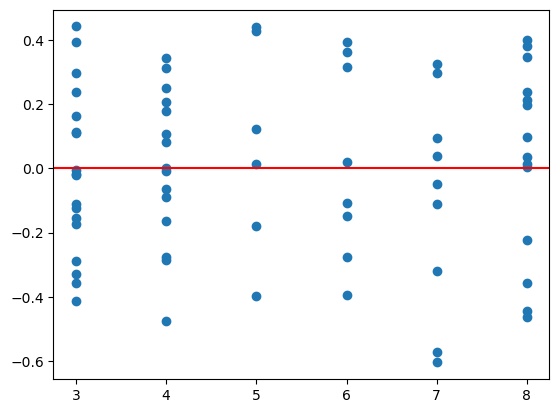

In [36]:
plt.scatter(x = X_train['number_courses'], y = error_terms)
plt.axhline(color='r')
plt.show()

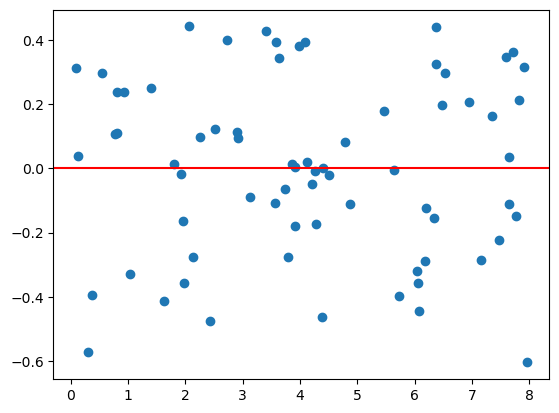

In [37]:
plt.scatter(x = X_train['time_study'], y = error_terms)
plt.axhline(color='r')
plt.show()

In [38]:
y_test_pred = lr.predict(X_test)
r2_score(y_test, y_test_pred)

0.9996752080872467